# Основные концепции Machine Learning. Домашняя работа

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

matplotlib.rc('font', size=10)

In [14]:
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

from sklearn.cluster import KMeans

In [4]:
phones = pd.read_csv('phones.csv')
phones.head(7)

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013
5,512,iOS,15842,2018
6,128,Android,7191,2015


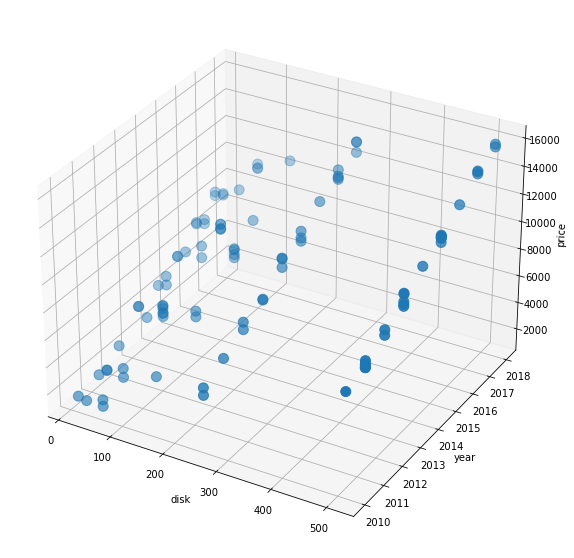

In [13]:
fig = plt.figure(figsize=(10, 10))  # Создаем картинку
ax = plt.axes(projection='3d')  # устанавливаем проекцию

# Помещаем точки на график
ax.scatter(phones['disk'], phones['year'], phones['price'], s=100)

# Называем оси
ax.set_xlabel('disk')
ax.set_ylabel('year')
ax.set_zlabel('price')

# Отображаем картинку
plt.show()

Задание 1: обучить модель регрессии

In [49]:
X = phones[['disk', 'year']]
y = phones['price']

reg = LinearRegression().fit(X, y)

In [20]:
reg.predict(X[0:1])[0]

7848.046694419114

In [22]:
disk_list, year_list = list(), list()

for x in np.linspace(min(phones['disk']), max(phones['disk']), 100):
    for y in np.linspace(min(phones['year']), max(phones['year']), 100):
        disk_list.append(x)
        year_list.append(y)
disk_list = np.array(disk_list).reshape(-1, 1)
year_list = np.array(year_list).reshape(-1, 1)
p = reg.predict(np.concatenate([disk_list, year_list], axis=1))

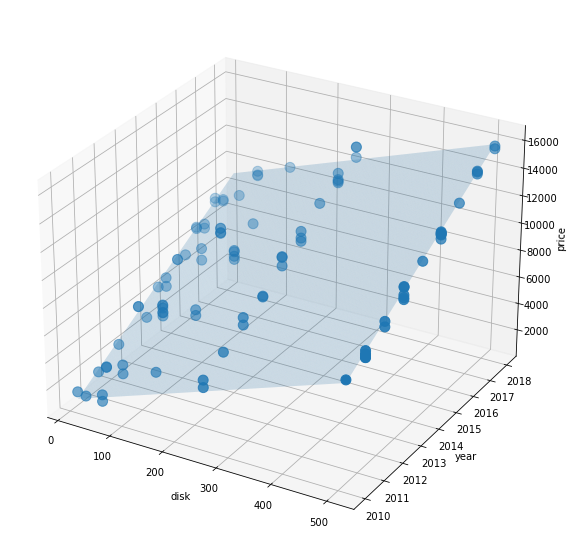

In [23]:
fig = plt.figure(figsize=(10, 10))  # Создаем картинку
ax = plt.axes(projection='3d')  # Устанавливаем проекцию

# Помещаем точки на график
ax.scatter(phones['disk'], phones['year'], phones['price'], s=100)

# Помещаем предсказанные значения на график
ax.plot_trisurf(disk_list.ravel(), year_list.ravel(), p.ravel(), alpha = 0.2)

# Называем оси
ax.set_xlabel('disk')
ax.set_ylabel('year')
ax.set_zlabel('price')

# Изменяем позицию камеры и отрисовываем картинку
ax.elev = 27
plt.show()

Задание 2: обучить модель классификации

In [48]:
X = phones[['disk']]
y = phones['os']

cl = DecisionTreeClassifier().fit(X, y)

In [46]:
print(export_text(cl))

|--- feature_0 <= 192.00
|   |--- class: Android
|--- feature_0 >  192.00
|   |--- class: iOS



In [47]:
cl.predict(X[10:11])[0], y[10]

('iOS', 'iOS')

Задание 3: обучить модель кластеризации

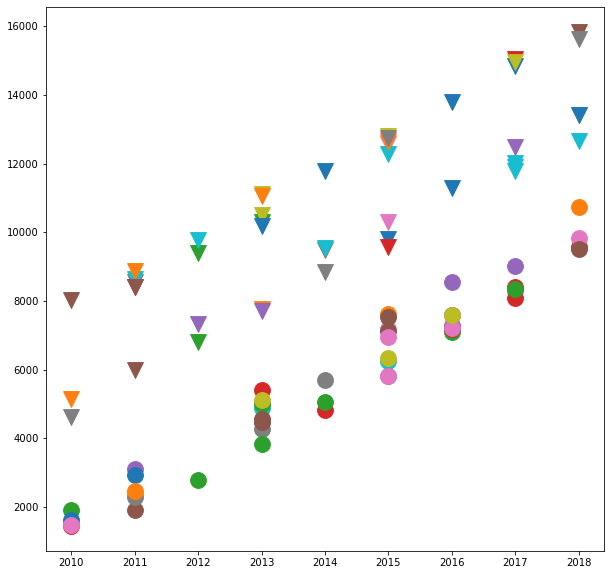

In [77]:
fig = plt.figure(figsize=(10, 10))  # Создаем картинку

markers = {'Android': 'o', 'iOS': 'v'}
for d1, d2, l in zip(phones.year, phones.price, phones.os):
    plt.scatter(d1, d2, s = 250, marker=markers[l])
    
# Отображаем картинку
plt.show()

In [78]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phones[['year', 'price']]

clust = KMeans(n_clusters=2).fit(X)

In [79]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###

In [80]:
clust.cluster_centers_

array([[ 2013.35      ,  5784.78333333],
       [ 2015.525     , 11601.65      ]])

In [81]:
[c1, c2] = clust.cluster_centers_

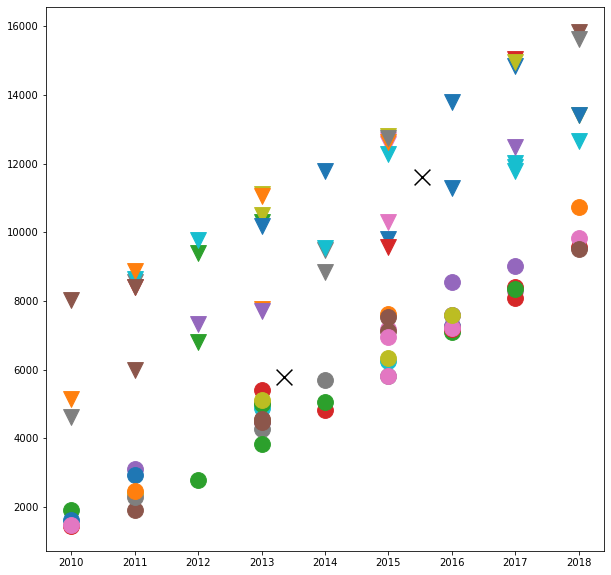

In [85]:
fig = plt.figure(figsize=(10, 10))  # Создаем картинку

markers = {'Android': 'o', 'iOS': 'v'}
for d1, d2, l in zip(phones.year, phones.price, phones.os):
    plt.scatter(d1, d2, s = 250, marker=markers[l])
        
# # Добавляем информацию о центрах кластеров
plt.scatter(c1[0], c1[1], s = 250, marker='x', c='black')

plt.scatter(c2[0], c2[1], s = 250, marker='x', c='black')

# Отображаем картинку
plt.show()